In [6]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
#import lightkurve as lk
import glob
import pickle
import pyphot
from pyphot import unit
from scipy import stats
import emcee
import corner
import pandas as pd
from bisect import bisect_left
import emcee

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table
import emcee
import corner

In [3]:
import sys
import wdtools.gaia

In [4]:
edr3 = Table.read('d62_edr3.fits')
obj = edr3[0]

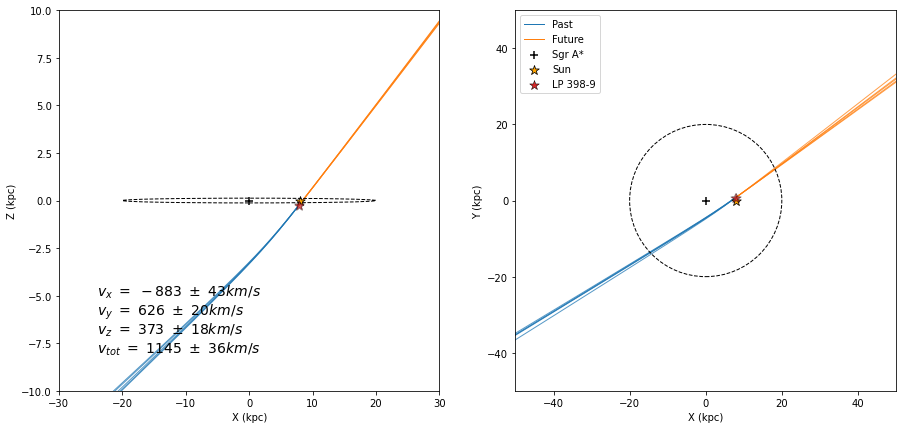

In [5]:
wdtools.gaia.plot_orbits('LP 398-9', obj, rv = 50, e_rv = 10, nmc = 1000, norbit = 5)

In [14]:
flatchain = wdtools.gaia.get_post_samples(obj, walkers = 100, burn = 1e3, steps = 1e4, 
                                          progress = True, L = 1350)

100%|██████████| 10000/10000 [00:36<00:00, 271.25it/s]


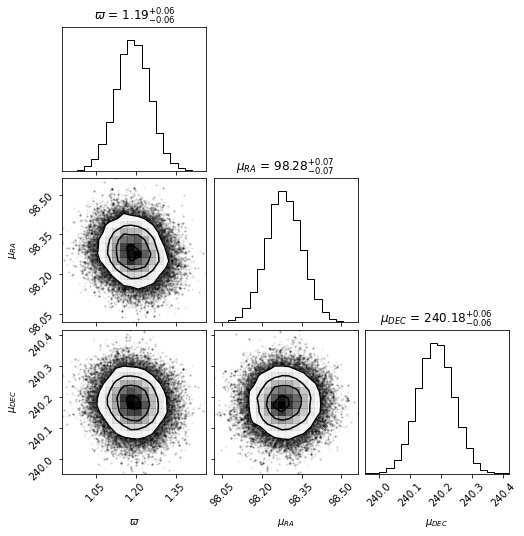

In [15]:
burn = 5000
thin = 10

f = corner.corner(flatchain[burn::thin], show_titles = True, 
                  labels = [r'$\varpi$', r'$\mu_{RA}$', r'$\mu_{DEC}$']);

In [16]:
distance = 1000 / flatchain[:, 0]
pm = np.sqrt(flatchain[:, 1]**2 + flatchain[:, 2]**2)
vt = 4.7 * pm / flatchain[:, 0]

allparams = np.vstack((flatchain.T, distance, pm, vt)).T
derived = np.vstack((distance, pm, vt)).T

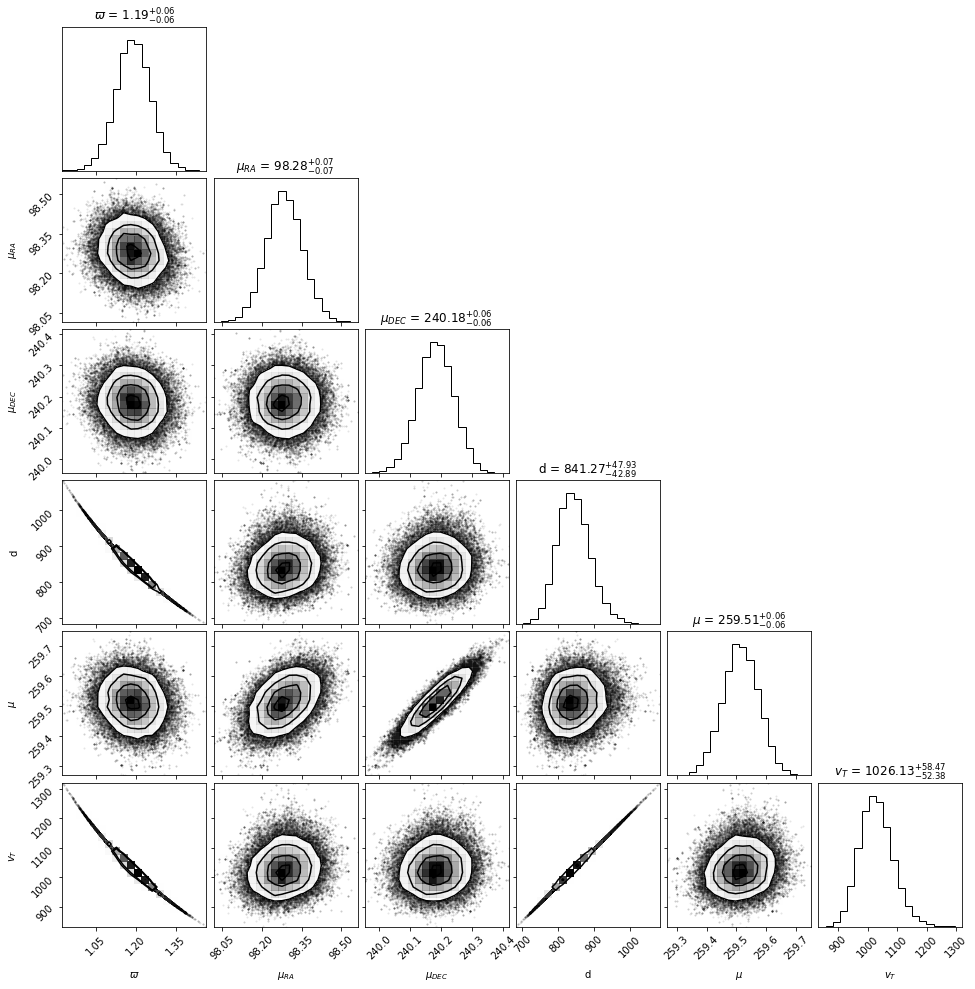

In [17]:
f = corner.corner(allparams[burn::thin], show_titles = True, 
                  labels = [r'$\varpi$', r'$\mu_{RA}$', r'$\mu_{DEC}$',
                           'd', r'$\mu$', r'$v_T$'],
                 title_kw = dict(fontsize = 14));

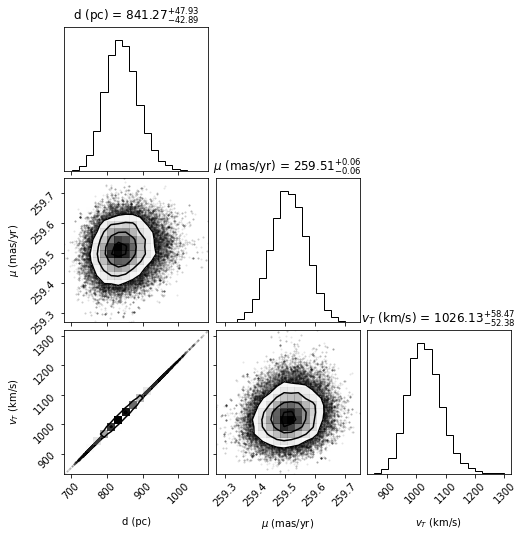

In [31]:
f = corner.corner(derived[burn::thin], show_titles = True, 
                  labels = [
                           'd (pc)', r'$\mu$ (mas/yr)', r'$v_T$ (km/s)'],
                 title_kw = dict(fontize = 12));

(1029.839784124122, 57.444424163862756)


Text(0, 0.5, 'Density')

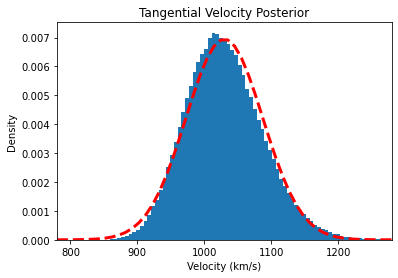

In [37]:
plt.title("Tangential Velocity Posterior")

plt.hist(vt, density = True, bins = 100);
prms = stats.norm.fit(vt)
print(prms)
vgrid = np.linspace(prms[0] - 250, prms[0] + 250)
plt.plot(vgrid, stats.norm(loc = prms[0], scale = prms[1]).pdf(vgrid), 'r--', lw = 3)

plt.xlim(prms[0] - 250, prms[0] + 250)

plt.xlabel('Velocity (km/s)')
plt.ylabel('Density')

In [38]:
# Tangential velocity CI

stats.norm(loc = prms[0], scale = prms[1]).ppf(0.01), stats.norm(loc = prms[0], scale = prms[1]).ppf(0.99)

(896.2040700950195, 1163.4754981532244)

In [39]:
p_1000 = np.sum((vt > 1000))  / len(vt)
p_1000

0.685055

In [40]:
obj['parallax'] / obj['parallax_error']

18.243538720990212